In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names


In [6]:
data_cat


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


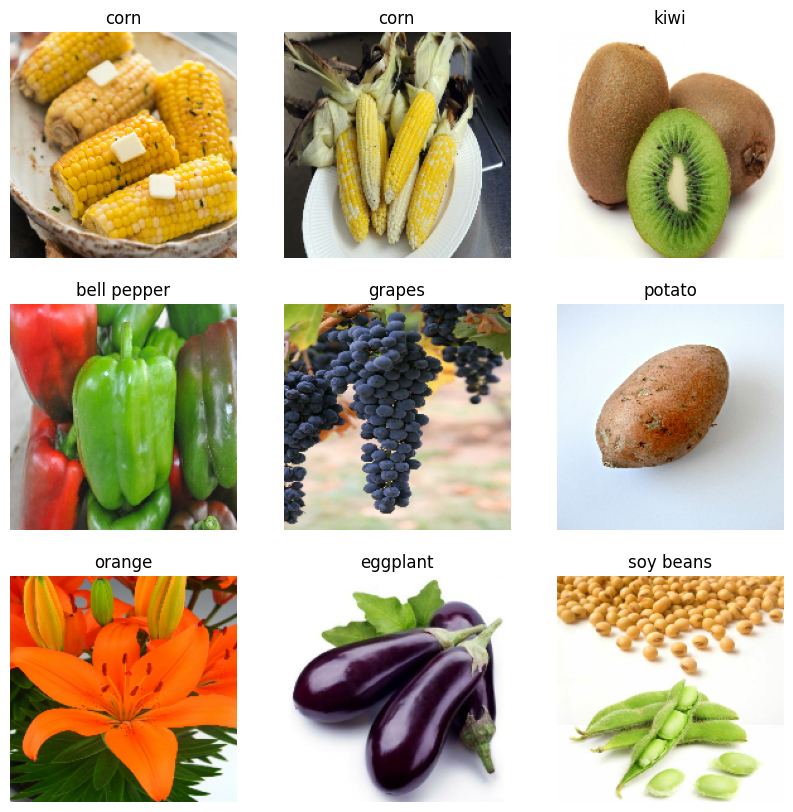

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential


In [11]:
data_train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 979ms/step - accuracy: 0.0595 - loss: 4.0040 - val_accuracy: 0.2877 - val_loss: 2.5471
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 867ms/step - accuracy: 0.2628 - loss: 2.6008 - val_accuracy: 0.5584 - val_loss: 1.5615
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 884ms/step - accuracy: 0.4131 - loss: 2.0064 - val_accuracy: 0.7521 - val_loss: 0.9800
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5270 - loss: 1.5813 - val_accuracy: 0.7749 - val_loss: 0.8385
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.6664 - loss: 1.0972 - val_accuracy: 0.8689 - val_loss: 0.5181
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8054 - loss: 0.6355 - val_accuracy: 0.8889 - val_loss: 0.5791
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 907ms/step - accuracy: 0.8817 - loss: 0.4143 - val_accuracy: 0.9060 - val_loss: 0.4885
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 866ms/step - accuracy: 0.9137 - loss: 0.2861 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

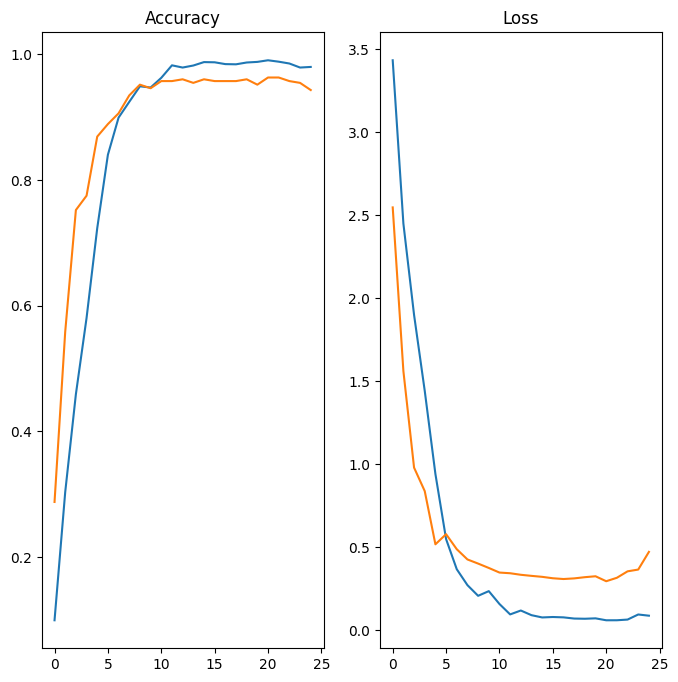

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [25]:
image = 'OIP.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [26]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


In [27]:
score = tf.nn.softmax(predict)

In [28]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


Veg/Fruit in image is sweetcorn with accuracy of 89.84


In [29]:
model.save('Image_classify.keras')
